<a href="https://colab.research.google.com/github/tgallach/8-23-19/blob/master/IE_602_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
from scipy.optimize import curve_fit
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

# Load data
df = pd.read_csv('/content/btc-usd-max.csv')
df.tail()

,snapped_at,price,market_cap,total_volume
2765,2020-11-24 00:00:00 UTC,18360.693300,3.406351e+11,3.338968e+10
2766,2020-11-25 00:00:00 UTC,19091.524182,3.542099e+11,4.942953e+10
2767,2020-11-26 00:00:00 UTC,18753.288922,3.481581e+11,3.214610e+10
2768,2020-11-27 00:00:00 UTC,17138.029512,3.179990e+11,4.873896e+10
2769,2020-11-28 00:00:00 UTC,17140.275553,3.180573e+11,3.068034e+10


In [10]:
# Remove "UTC" from Timestamp
df['snapped_at'] = df['snapped_at'].map(lambda x: x.rstrip('UTC'))
df.head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00,103.43,1.148668e+09,0.0


In [11]:
#Convert Timestamp to time series
import datetime as dt
df['snapped_at'] = pd.to_datetime(df['snapped_at'])
df['snapped_at']=df['snapped_at'].map(dt.datetime.toordinal)
df.head()

,snapped_at,price,market_cap,total_volume
0,734986,135.30,1.500518e+09,0.0
1,734987,141.96,1.575032e+09,0.0
2,734988,135.30,1.501657e+09,0.0
3,734989,117.00,1.298952e+09,0.0
4,734990,103.43,1.148668e+09,0.0


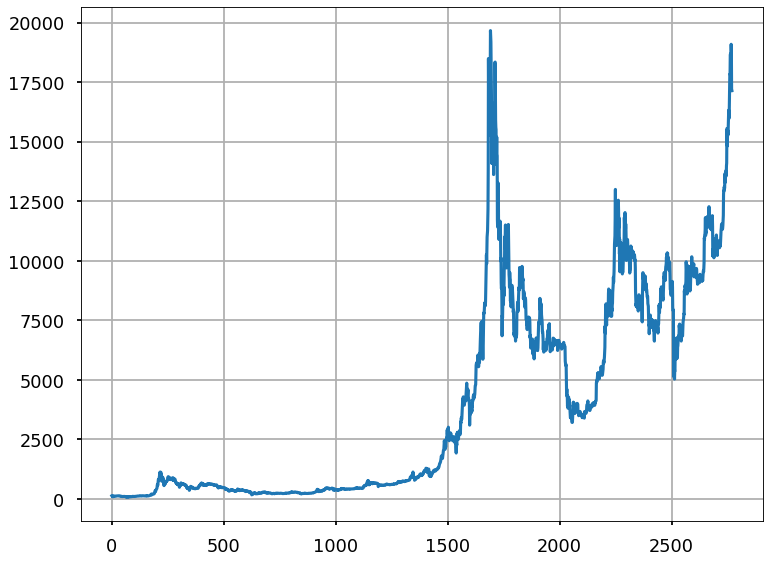

In [12]:
#Plot Bitcoin price vs time
from matplotlib.pyplot import figure
figure(num=None, figsize=(11, 8.5), dpi=80, facecolor='w', edgecolor='k')


x = list(range(0, len(df.price), 1))
y = df.price
plt.plot(x, y)
plt.grid()

y = -0.04716 * x + 0.00161 * x^2 + -144.97731


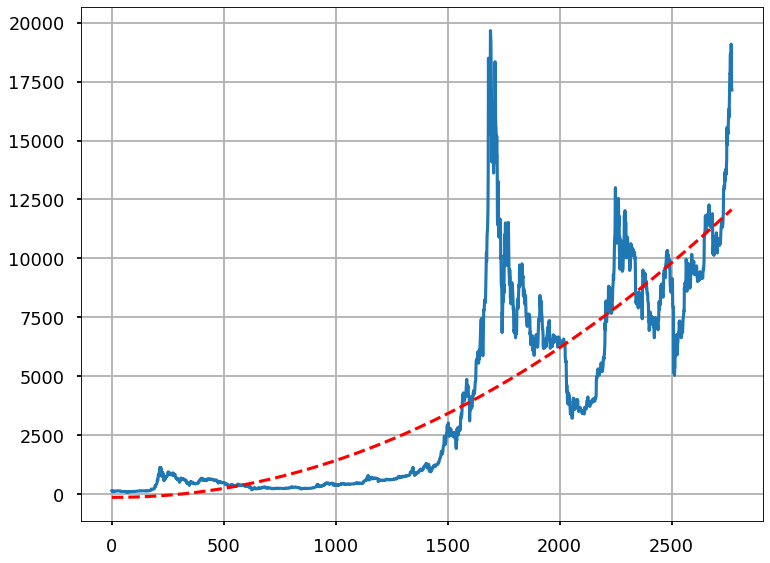

In [14]:
#Second Degree Polynomial Fitting Using LM

# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c

# fit a second degree polynomial to the data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

from matplotlib.pyplot import figure
figure(num=None, figsize=(11, 8.5), dpi=80, facecolor='w', edgecolor='k')


# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
plt.plot(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
plt.grid()
pyplot.show()

y = 26.11916 * x + -0.0762474053 * x^2 + 0.0000805711 * x^3 + -0.00000003385402111558 * x^4 + 0.00000000000496367922 * x^5 + -1655.92816


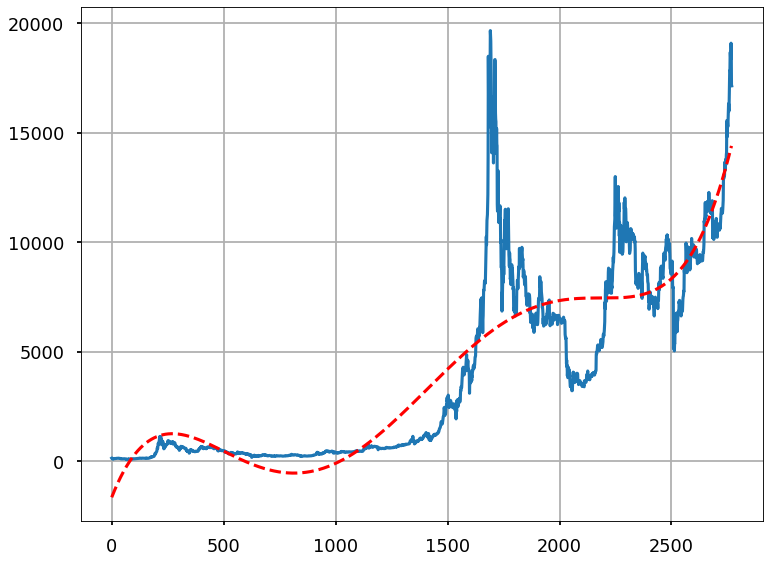

In [15]:
# fit a fifth degree polynomial to the ecnomic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

from matplotlib.pyplot import figure
figure(num=None, figsize=(11, 8.5), dpi=80, facecolor='w', edgecolor='k')

# define the true objective function
def objective(x, a, b, c, d, e, r):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + r

# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, d, e, r = popt
print('y = %.5f * x + %.10f * x^2 + %.10f * x^3 + %.20f * x^4 + %.20f * x^5 + %.5f' % (a, b, c, d, e, r))
# plot input vs output
plt.plot(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, r)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
plt.grid()
pyplot.show()



In [16]:
#Reload data for Prophet fitting
df = pd.read_csv('/content/btc-usd-max.csv')
df.head()


,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [20]:
#Reshape dataframe for acceptance into Prophet
df_new=df.drop(['market_cap', 'total_volume'], axis=1)
df_new['snapped_at'] = df_new['snapped_at'].map(lambda x: x.rstrip('UTC'))
df_new.tail()

,snapped_at,price
2765,2020-11-24 00:00:00,18360.693300
2766,2020-11-25 00:00:00,19091.524182
2767,2020-11-26 00:00:00,18753.288922
2768,2020-11-27 00:00:00,17138.029512
2769,2020-11-28 00:00:00,17140.275553


In [21]:
# fit prophet model on the Bitcoin Price dataset
from pandas import read_csv
from pandas import to_datetime
from fbprophet import Prophet
# prepare expected column names
df_new.columns = ['ds', 'y']
df_new['ds']= to_datetime(df_new['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df_new)

           ds          yhat    yhat_lower    yhat_upper
0  2021-01-01  12606.158051  10919.797805  14293.016415
1  2021-02-01  11982.569062  10298.302060  13562.572727
2  2021-03-01  12325.933872  10599.673222  14047.167717
3  2021-04-01  11680.909665   9781.756269  13464.459214
4  2021-05-01  12615.704828  10575.210471  14744.539718
5  2021-06-01  13211.269947  10720.814845  15454.738591
6  2021-07-01  13686.634058  10977.309799  16248.899822
7  2021-08-01  14083.387461  11074.752686  17030.068208
8  2021-09-01  14287.997479  10759.723337  17634.400339
9  2021-10-01  14057.353878  10246.000946  17727.751947
10 2021-11-01  14929.676892  10405.964036  19027.804950
11 2021-12-01  15294.319013  10420.741630  20035.068496


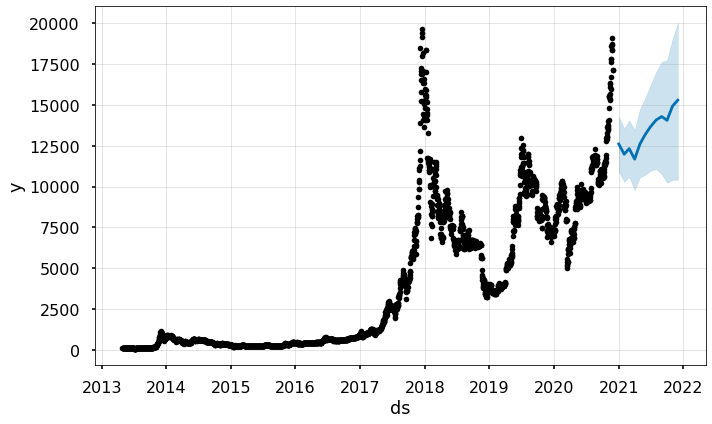

In [22]:
# make an out-of-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '2021-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(12))
# plot forecast
model.plot(forecast)
pyplot.show()